In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.



# CHUNK_SIZE = 40960
# DATA_SOURCE_MAPPING = 'fruits-dataset-for-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4381992%2F7522318%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240725%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240725T222852Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D819675b30b5ff8762ae54d1417a20f3e81f886f3807fe3e7b67df2801f41cd75505682ee2a4187566489c31d94619e074ce945e44895bfbf033aafb1aec0196dcf0eadaefce9e40314a08044c2252fabf4aa2d5ed9de9d26801c8beb89c401b8f3a9acc78ff7f2818b6b621621c5ed3e63e74ccdf7bda6f3f42ee1fd778e1e72dc7f014a4ed3a24868da86117bad66bafc090ccce46fc1f0ace602c7d3d900ff56a59fbef0c9117ed3c74d4be68d892b4483ddbf44d48f2aadf76f77019e081d81aa3a6dc010fc76881f3d6774b57831abd04a9162f47c59ed50fe9ec41bcef49c63ea9cba18a056ad5bb8d8ee793fe24a85b3d173721735a6d67f4b972207f6'

# KAGGLE_INPUT_PATH='/kaggle/input'
# KAGGLE_WORKING_PATH='/kaggle/working'
# KAGGLE_SYMLINK='kaggle'

# !umount /kaggle/input/ 2> /dev/null
# shutil.rmtree('/kaggle/input', ignore_errors=True)
# os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
# os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

# try:
#   os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
# except FileExistsError:
#   pass
# try:
#   os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
# except FileExistsError:
#   pass

# for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
#     directory, download_url_encoded = data_source_mapping.split(':')
#     download_url = unquote(download_url_encoded)
#     filename = urlparse(download_url).path
#     destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
#     try:
#         with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
#             total_length = fileres.headers['content-length']
#             print(f'Downloading {directory}, {total_length} bytes compressed')
#             dl = 0
#             data = fileres.read(CHUNK_SIZE)
#             while len(data) > 0:
#                 dl += len(data)
#                 tfile.write(data)
#                 done = int(50 * dl / int(total_length))
#                 sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
#                 sys.stdout.flush()
#                 data = fileres.read(CHUNK_SIZE)
#             if filename.endswith('.zip'):
#               with ZipFile(tfile) as zfile:
#                 zfile.extractall(destination_path)
#             else:
#               with tarfile.open(tfile.name) as tarfile:
#                 tarfile.extractall(destination_path)
#             print(f'\nDownloaded and uncompressed: {directory}')
#     except HTTPError as e:
#         print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
#         continue
#     except OSError as e:
#         print(f'Failed to load {download_url} to path {destination_path}')
#         continue

# print('Data source import complete.')

import os
import shutil
from PIL import Image
import numpy as np
import pandas as pd

# Local directory paths
PROJECT_DIR = 'D:\windsor\Sem-2\ASP\Project\Project'
DATASET_DIR = os.path.join(PROJECT_DIR, 'dataset')
TRAIN_DIR = os.path.join(DATASET_DIR, 'Train')
TEST_DIR = os.path.join(DATASET_DIR, 'Test')

# Function to load images from a directory
def load_images_from_dir(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for img_file in os.listdir(label_dir):
                img_path = os.path.join(label_dir, img_file)
                try:
                    with Image.open(img_path) as img:
                        img = img.convert('RGB')  # Ensure image is in RGB format
                        images.append(np.array(img))
                        labels.append(label)
                except Exception as e:
                    print(f'Error loading image {img_path}: {e}')
    return images, labels

# Load training and testing images
train_images, train_labels = load_images_from_dir(TRAIN_DIR)
test_images, test_labels = load_images_from_dir(TEST_DIR)

print(f'Loaded {len(train_images)} training images and {len(test_images)} testing images.')

# Example: Print the shape of the first image and its label
if train_images:
    print(f'Example image shape: {train_images[0].shape}')
    print(f'Example label: {train_labels[0]}')



<>:72: SyntaxWarning: invalid escape sequence '\w'
<>:72: SyntaxWarning: invalid escape sequence '\w'
C:\Users\HP\AppData\Local\Temp\ipykernel_16032\1629443932.py:72: SyntaxWarning: invalid escape sequence '\w'
  PROJECT_DIR = 'D:\windsor\Sem-2\ASP\Project\Project'


Loaded 23619 training images and 6738 testing images.
Example image shape: (386, 470, 3)
Example label: freshapples


### Read Data

In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau



In [3]:
furits = "D:\windsor\Sem-2\ASP\Project\Project\dataset\Train"
images=[]
labels=[]
for i,file in  enumerate(os.listdir(furits)):
    for img in os.listdir(os.path.join(furits,file)):
        im=(os.path.join(furits,file,img))
        images.append(im)
        labels.append(i)



<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\HP\AppData\Local\Temp\ipykernel_16032\3341617150.py:1: SyntaxWarning: invalid escape sequence '\w'
  furits = "D:\windsor\Sem-2\ASP\Project\Project\dataset\Train"


### chek data balance

In [4]:
class_title={0:'fresh_peaches_done',
             1:'fresh_pomegranates_done',
             2:'fresh_strawberries_done',
             3:'rotten_peaches_done',
             4:'rotten_pomegranates_done',
             5:'rotten_strawberries_done'}

In [5]:
result=[]
for i in range(6):
    result.append({"label":class_title[i],"count":labels.count(i)})


<Axes: ylabel='count'>

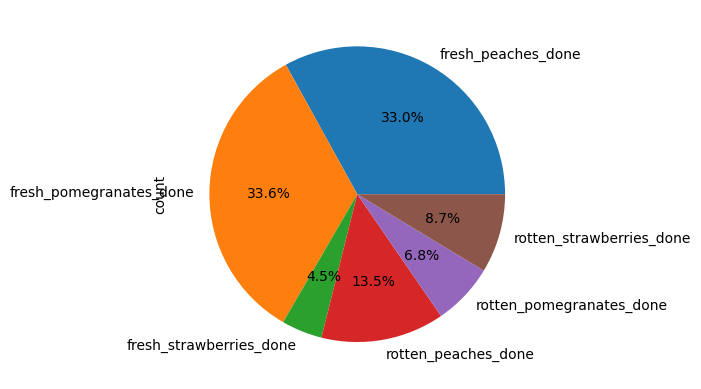

In [7]:

df=pd.DataFrame(result)
df["count"].plot(kind="pie",labels=df['label'].values,autopct='%1.1f%%')

In [13]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

import pandas as pd

min_class =min(labels.count(i) for i in range(6))
balance_labels=[]
balance_images=[]

for i in range(6):
    class_indices=[index for index,label in enumerate(labels) if label ==i]
    balanced_indices=resample(class_indices,replace=True,n_samples=min_class,random_state=42)
    balance_labels.extend([labels[index] for index in balanced_indices])
    balance_images.extend([images[index] for index in balanced_indices])

### display data after balanced

<Axes: ylabel='count_balanced'>

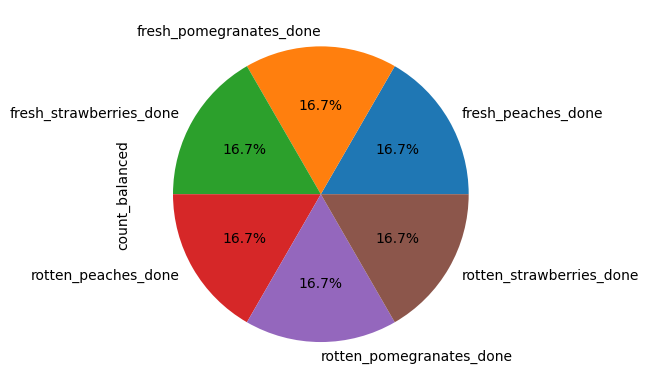

In [14]:
result_balanced=[]
for i in range(6):
    result_balanced.append({"label_balanced":class_title[i],"count_balanced":balance_labels.count(i)})

df_balanced=pd.DataFrame(result_balanced)
df_balanced["count_balanced"].plot(kind="pie",labels=df_balanced['label_balanced'].values,autopct='%1.1f%%')

### Split Data

In [15]:
x_train,x_test,y_train,y_test=train_test_split(balance_images,balance_labels,test_size=0.2,random_state=42)

In [16]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [17]:
# class_weights=compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
# class_weights_dict=dict(enumerate(class_weights))

In [18]:
y_train=list(map(str,y_train))
y_test=list(map(str,y_test))

### Data agumention

In [19]:

train_datagen=ImageDataGenerator(

                        rescale=1./255.0,
                        rotation_range=40,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        shear_range=0.2,
                        zoom_range=0.2,
                        horizontal_flip=True,
                )

test_datagen=ImageDataGenerator(rescale=1.0/255)

train_genertor=train_datagen.flow_from_dataframe(

                    dataframe=pd.DataFrame({'imgs':x_train,'labels':y_train}),
                    x_col='imgs'
                    ,y_col='labels',
                    target_size=(224,224),
                    class_mode="categorical",
                    shuffle=False,
                    batch_size=64,
                )


test_genertor=test_datagen.flow_from_dataframe(
                    dataframe=pd.DataFrame({'imgs':x_test,'labels':y_test}),
                     x_col='imgs'
                    ,y_col='labels',
                    target_size=(224,224),
                    class_mode="categorical",
                    shuffle=False,
                    batch_size=64,
                )

Found 1569 validated image filenames belonging to 6 classes.
Found 393 validated image filenames belonging to 6 classes.


### Display some of images

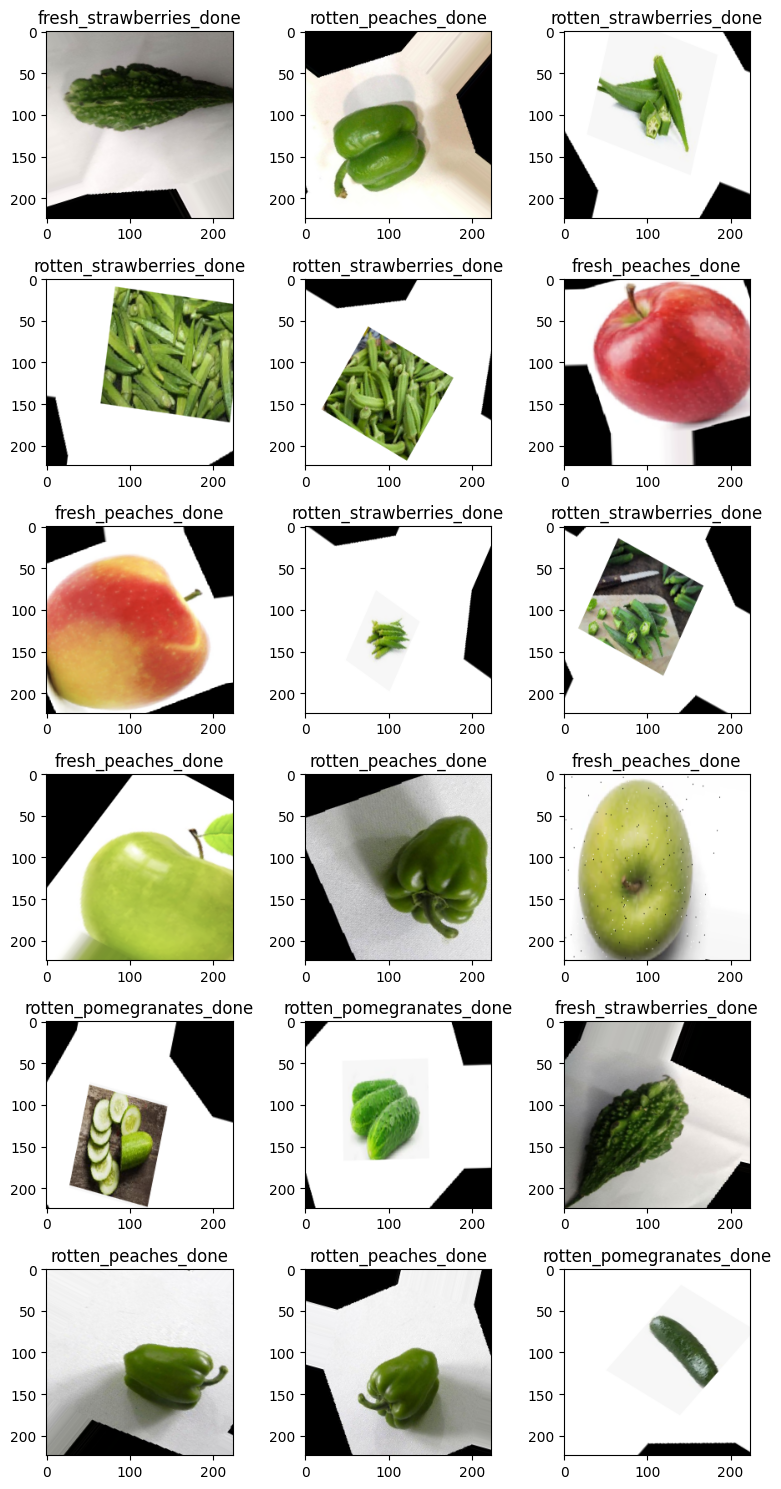

In [21]:


import matplotlib.pyplot as plt

fig,ax=plt.subplots(6,3,figsize=(8,15))
classes=list(range(6))

for class_idx in classes:
    for i in range(3):
        img,label=next(train_genertor)
        for idx,val in enumerate(label[0]):
            if val==1:
                x=idx
                break
        ax[class_idx,i].imshow(img[0])
        ax[class_idx,i].set_title(class_title[x])
plt.tight_layout()
plt.show()

### Bulid model structure

In [22]:
Model=VGG16(include_top=False,weights='imagenet',pooling='avg',input_shape=(224,224,3))

for layer in Model.layers:
   layer.trainable=False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Define the base model with VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to avoid training its weights
base_model.trainable = False

# Create the model
model = Sequential()

# Add the VGG16 base model
model.add(base_model)

# Add Global Average Pooling layer
model.add(GlobalAveragePooling2D())

# Add fully connected layers
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

# Output layer with 6 units for 6 classes
model.add(Dense(6, activation="softmax"))

# Print model summary
model.summary()


ValueError: Undefined shapes are not supported.

In [25]:
model.compile(
optimizer=keras.optimizers.Adam(learning_rate=0.001),
loss=keras.losses.CategoricalCrossentropy(),
metrics=["accuracy"],
)

NameError: name 'model' is not defined

In [ ]:
history = model.fit(train_genertor,validation_data=test_genertor,verbose=2,epochs=30,steps_per_epoch=len(train_genertor.classes)//64)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 8))

ax[0].plot(history.history['accuracy'], label='accuracy')
ax[0].plot(history.history['val_accuracy'], label='val_accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(history.history['loss'], label='loss')
ax[1].plot(history.history['val_loss'], label='val_loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.tight_layout()
plt.show()